In [1]:
import pandas as pd
data = pd.read_pickle("../datasets/electric/201802_notna_date_data.pkl")
data.head()

,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,bill_post_time,payment_time,channel,location,Lng,Lat,payment_time_2,bill_post_time_2,pay_days
0,沪东营销分中心,6.416346e+09,1226239768,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄4号2202室,60.1,86.0,23.0,20180206.0,2018-02-23 09:38:30,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-23 09:38:30,2018-02-06,17.0
1,沪东营销分中心,6.416346e+09,1226238000,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号2004室,536.0,701.0,337.0,20180206.0,2018-02-21 17:51:21,付费通,上海市虹口区物华路118弄,121.5,31.265,2018-02-21 17:51:21,2018-02-06,15.0
2,沪东营销分中心,6.416345e+09,1226237443,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号604室,126.1,179.0,51.0,20180206.0,2018-02-06 15:25:39,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 15:25:39,2018-02-06,0.0
3,沪东营销分中心,6.416345e+09,1226237430,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号603室,131.5,128.0,171.0,20180206.0,2018-02-06 17:38:07,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 17:38:07,2018-02-06,0.0
4,沪东营销分中心,6.416355e+09,1226625666,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄5号2101室,25.8,561.0,238.0,20180206.0,2018-02-06 13:58:14,九龙抄表班,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 13:58:14,2018-02-06,0.0


In [2]:
data.count()

supply_unit         7626738
B                   7626738
user_id             7626738
chaobiaoduan        7626738
station             5546748
regions             7624888
address             7626738
fee                 7626738
flat_power          7626551
valley_power        7625323
bill_post_time      7626738
payment_time        7626738
channel             7612515
location            7626738
Lng                 7626738
Lat                 7626738
payment_time_2      7626738
bill_post_time_2    7626738
pay_days            7626738
dtype: int64

In [3]:
data_sample1 = data.sample(n=2000)

In [4]:
data_sample1.count()

supply_unit         2000
B                   2000
user_id             2000
chaobiaoduan        2000
station             1459
regions             1999
address             2000
fee                 2000
flat_power          2000
valley_power        2000
bill_post_time      2000
payment_time        2000
channel             1997
location            2000
Lng                 2000
Lat                 2000
payment_time_2      2000
bill_post_time_2    2000
pay_days            2000
dtype: int64

In [17]:
sample_a = data_sample1.loc[:,['fee','pay_days','flat_power']]
sample_a.head()

,fee,pay_days,flat_power
6370877,193.9,20.0,273.0
7290927,12.0,11.0,18.0
355673,106.0,4.0,127.0
6293211,66.9,8.0,102.0
6361008,231.5,17.0,335.0


In [18]:
# 将sample_a 转换成数组
a_1 = sample_a.values
a_1

array([[193.9,  20. , 273. ],
       [ 12. ,  11. ,  18. ],
       [106. ,   4. , 127. ],
       ...,
       [ 63.8,  55. ,  86. ],
       [397.8,  15. , 513. ],
       [116.8,   7. , 151. ]])

           fee   pay_days   flat_power
0   267.973780  14.365854   358.573171
1    85.104582  15.622785   113.388186
2  1656.808333  14.750000  2027.666667
3   582.167347  14.619048   789.285714


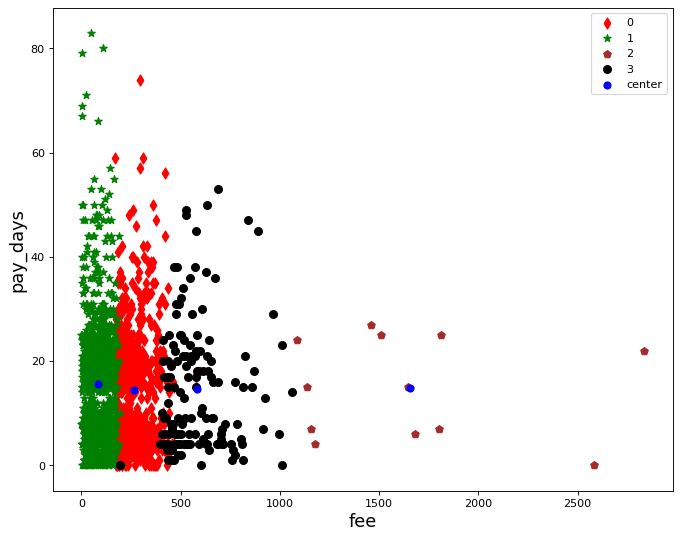

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# n_clusters=4，参数设置需要的分类这里设置成4类
kmeans = KMeans(n_clusters=4, random_state=0).fit(a_1)
#center为各类的聚类中心，保存在df_center的DataFrame中给数据加上标签
center = kmeans.cluster_centers_
df_center = pd.DataFrame(center, columns=['fee','pay_days','flat_power'])
print(df_center)

#标注每个点的聚类结果
labels = kmeans.labels_
#将原始数据中的索引设置成得到的数据类别，根据索引提取各类数据并保存
df = pd.DataFrame(a_1, index=labels, columns=['fee','pay_days','flat_power'])
df1 = df[df.index==0]
df2 = df[df.index==1]
df3 = df[df.index==2]
df4 = df[df.index==3]
#绘图
plt.figure(figsize=(10,8), dpi=80)
axes = plt.subplot()
#s表示点大小，c表示color，marker表示点类型，DataFrame数据列引用参考博客其他文章
type1 = axes.scatter(df1.loc[:,['fee']], df1.loc[:,['pay_days']], s=50, c='red', marker='d')
type2 = axes.scatter(df2.loc[:,['fee']], df2.loc[:,['pay_days']], s=50, c='green', marker='*')
type3 = axes.scatter(df3.loc[:,['fee']], df3.loc[:,['pay_days']], s=50, c='brown', marker='p')
type4 = axes.scatter(df4.loc[:,['fee']], df4.loc[:,['pay_days']], s=50, c='black')
#显示聚类中心数据点
type_center = axes.scatter(df_center.loc[:,'fee'], df_center.loc[:,'pay_days'], s=40, c='blue')
plt.xlabel('fee', fontsize=16)
plt.ylabel('pay_days', fontsize=16)
axes.legend((type1, type2, type3, type4, type_center), ('0','1','2','3','center'), loc=1)
plt.show()

0.6129616025512798


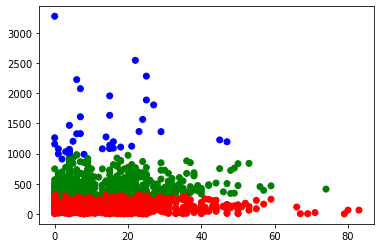

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 生成数据
# X, y = make_blobs(n_samples=200, centers=3, n_features=5, random_state=0)
X = a_1
y = ['fee','pay_days','flat_power']

# k-means聚类
km = KMeans(n_clusters=3)
km.fit(X)
y_predict = km.predict(X)

# 评估聚类效果
print(silhouette_score(X, y_predict))
# 0.72

# 绘制聚类结果图
color = ["red", "green", "blue"]
colors = [color[i] for i in y_predict]

plt.figure()
plt.scatter(X[:, 1], X[:, 2], color=colors)
plt.show()

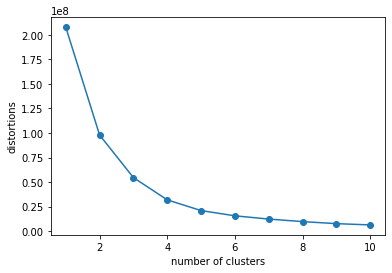

In [11]:
d=[]
for i in range(1,11):    #k取值1~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    d.append(km.inertia_)  #inertia簇内误差平方和

plt.plot(range(1,11),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()